In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import scipy
# import torch
from PIL import Image




(4032, 3024, 3)


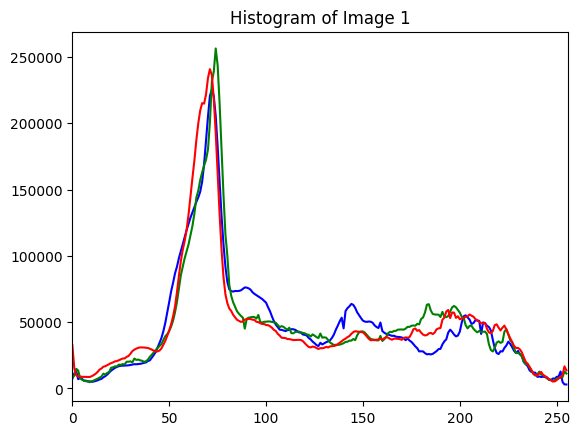

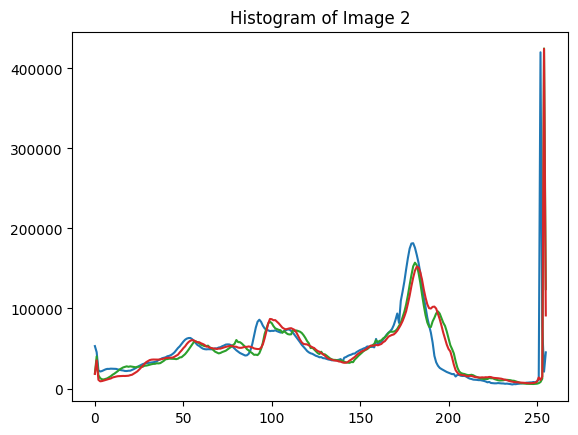

IndexError: index 4 is out of bounds for axis 0 with size 4

In [3]:
path = r"C:\Users\andyc\Documents\Tufts\_CS141\Homeworks\HW2\images\Windows_L.png"  
img1 = cv2.imread(path)

size = img1.shape
print(size)

path = r"C:\Users\andyc\Documents\Tufts\_CS141\Homeworks\HW2\images\Windows_R.png" 
img2 = cv2.imread(path)
# ksize = (150,1)
# img2 = cv2.blur(img2, ksize)
# Window name in which image is displayed  
window_name = 'Image'

bins = 80
  
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read"

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.title("Histogram of Image 1")
plt.show()


color_tab = ('tab:blue','tab:green','tab:red')
for i,col in enumerate(color_tab):
    hist2 = cv2.calcHist([img2],[i],None,[256],[0,256])
    plt.plot(hist2,color = col)
plt.title("Histogram of Image 2")
plt.show()

cv2.imshow(window_name, img1)
k = cv2.waitKey(0)
if k == 27 or k == ord('q'):
    cv2.destroyAllWindows()
cv2.imshow(window_name, img2)
k = cv2.waitKey(0)
if k == 27 or k == ord('q'):
    cv2.destroyAllWindows()


img1_Hist = cv2.calcHist([img1], [0, 1, 2], None, [bins, bins, bins], [0, 255, 0, 255, 0, 255]) #Histogram of observation image
cv2.normalize(img1_Hist, img1_Hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);

img2_Hist = cv2.calcHist([img2], [0, 1, 2], None, [bins, bins, bins], [0, 255, 0, 255, 0, 255]) #Histogram of observation image
cv2.normalize(img2_Hist, img2_Hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);

testHist = img1_Hist
refHist = img2_Hist

accuracy_metric = np.zeros(4)
 
accuracy_metric[0] = (cv2.compareHist(refHist, testHist, cv2.HISTCMP_CORREL)) # Correlation
accuracy_metric[1] = (cv2.compareHist(refHist, refHist, cv2.HISTCMP_CHISQR)) # Chi-Squared
accuracy_metric[2] = (cv2.compareHist(refHist, refHist, cv2.HISTCMP_INTERSECT )) # Intersection
accuracy_metric[3] = (cv2.compareHist(refHist, refHist, cv2.HISTCMP_BHATTACHARYYA )) # Bhattacharyya Distance

In [3]:
# path = r"C:\Users\andyc\Documents\Tufts\_CS141\Homeworks\HW2\MarioMap.png"  
# map = cv2.imread(path)  
# window_name = "map"
# cv2.imshow(window_name, map)
# k = cv2.waitKey(0)
# if k == 27 or k == ord('q'):
#     msg = "Press q to advance simulation"
#     print(msg)
#     cv2.destroyAllWindows()

